# Fast Calorimeter Simulation Challenge 2022 - data playground

https://zenodo.org/records/8099322\
https://zenodo.org/records/6366271\
https://zenodo.org/records/6366324

* $N$: number of events
    - dataset 1.photons:    242000
    - dataset 1.pions:      241600
    - dataset 2:            200000
    - dataset 3:            200000
* $V$: total number of voxels
    - dataset 1.photons:    368     (5 layers, inhomogeneous splits)
    - dataset 1.pions:      533     (7 layers, inhomogeneous splits)
    - dataset 2:            6480    (45 layers, 16 ang splits, 9 rad splits)
    - dataset 3:            40500   (45 layers, 50 ang splits, 18 rad splits)
* $E_{i}=1,\dots,N$: incident energy
* $\pmb{x}_{i}\in \mathbb{R}^V$ energy deposits across voxels
* `showers.hdf5` numpy array of shape (N, V)
* `incident_energes.hdf5` numpy array of shape (N, 1)

$$
\pmb{E} = 
\begin{bmatrix}
E_1\\
E_2\\
\vdots\\
E_N
\end{bmatrix},
\ \ \ 
X = 
\begin{bmatrix}
\ \pmb{x}^t_1 \\
\ \pmb{x}^t_2 \\
\vdots\\
\ \pmb{x}^t_N 
\end{bmatrix}
$$

$$
\pmb{x}_i = f(E_i;\ pid_j,\ geometry_j),\quad i=1,..,N,\quad j={1,2,3,4}
$$

## Load dataset

In [ ]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sys
sys.path.append('../CaloChallenge/code/')
from HighLevelFeatures import HighLevelFeatures as HLF
import os

# === Path to your dataset ===
# filename = "../calo-data/dataset_1_pions_1.hdf5"
# filename = "../calo-data/dataset_1_pions_2.hdf5"
# filename = "../calo-data/dataset_1_photons_1.hdf5"
# filename = "../calo-data/dataset_1_photons_2.hdf5"
# filename = "../calo-data/dataset_2_1.hdf5"
# filename = "../calo-data/dataset_2_2.hdf5"
# filename = "../calo-data/dataset_3.hdf5"

i_idcs = None
# i_idcs = np.arange(0,100)

# === Open the HDF5 file ===
with h5py.File(filename, "r") as f:
    print("Features in " + os.path.basename(filename) + ":", list(f.keys()))

    showers = f["showers"][i_idcs,:] if i_idcs is not None else f["showers"]
    showers = np.array(showers)
    incident_energies = f["incident_energies"][i_idcs] if i_idcs is not None else f["incident_energies"]
    incident_energies = np.array(incident_energies)

print("Showers shape:", showers.shape)
print("Incident energies shape:", incident_energies.shape)

Features in dataset_2_2.hdf5: ['incident_energies', 'showers']
Showers shape: (100000, 6480)
Incident energies shape: (100000, 1)


## Layer profiles of a single shower

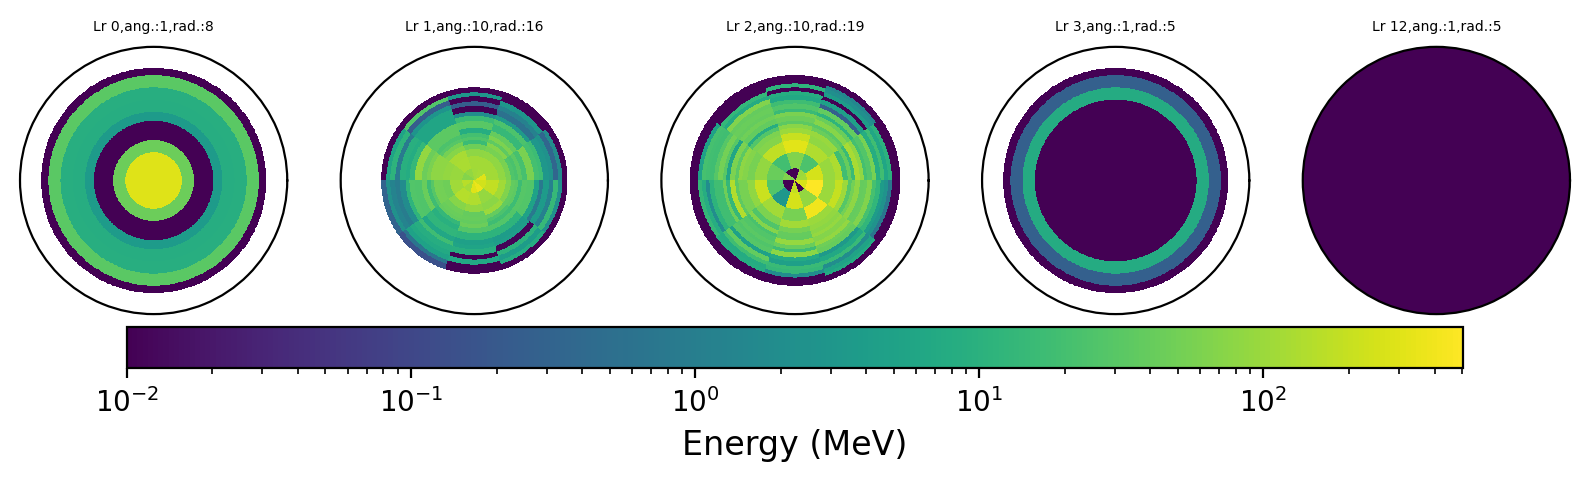

(0.0, 368.0)

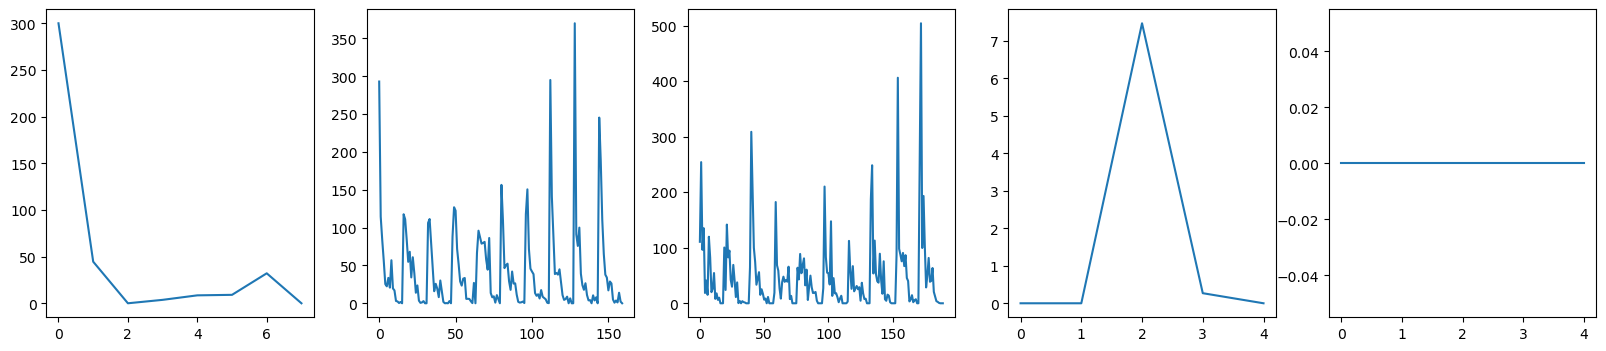

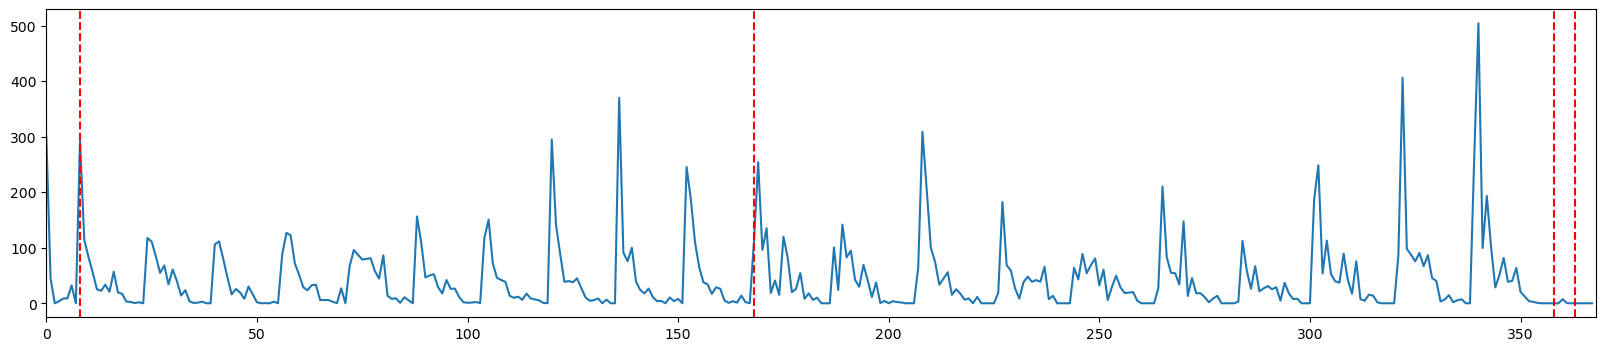

In [54]:
i_idx = 0 # incident id

hlf = HLF('photon', filename='../CaloChallenge/code/binning_dataset_1_photons.xml')
# hlf = HLF('electron', filename='../CaloChallenge/code/binning_dataset_2.xml')

shower = showers[i_idx, :]

hlf.DrawSingleShower(shower)

num_layers = len(hlf.relevantLayers)

lr_bound = np.unique(hlf.bin_edges)

plt.figure(figsize=(20,4))
for lr_idx in range(0,num_layers):
    plt.subplot(1,num_layers, lr_idx+1)
    plt.plot(showers[i_idx, lr_bound[lr_idx]:lr_bound[lr_idx+1]])
    

plt.figure(figsize=(20,4))
plt.plot(shower)
for lr_idx in range(0,num_layers):
    plt.axvline(x=lr_bound[lr_idx], color='red', linestyle='--')
plt.xlim(0,np.array(shower.shape).prod())

## Average shower for Energy Level

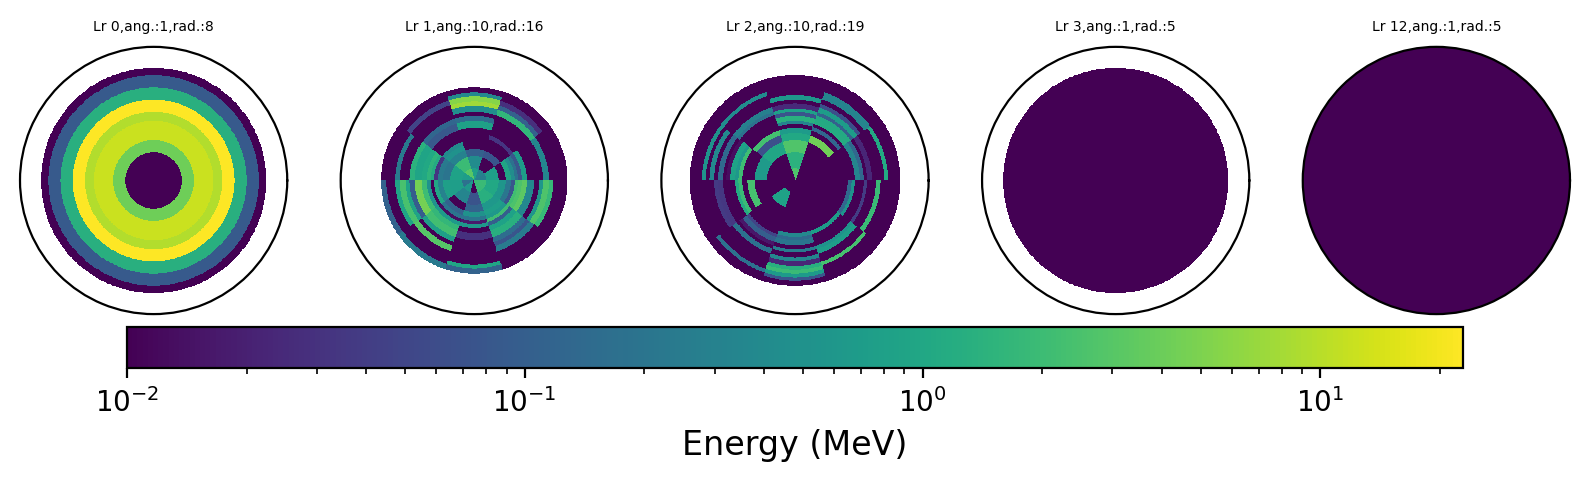

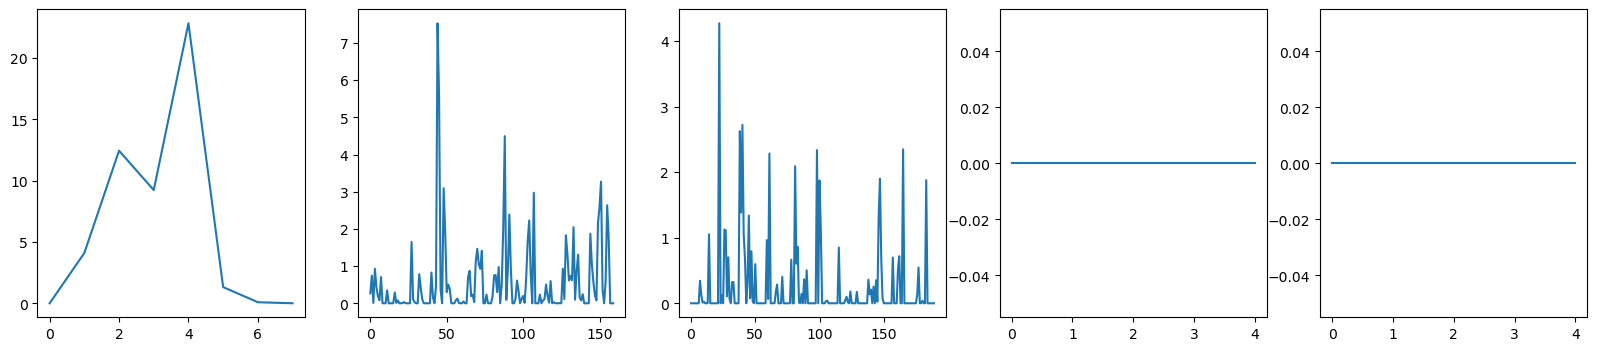

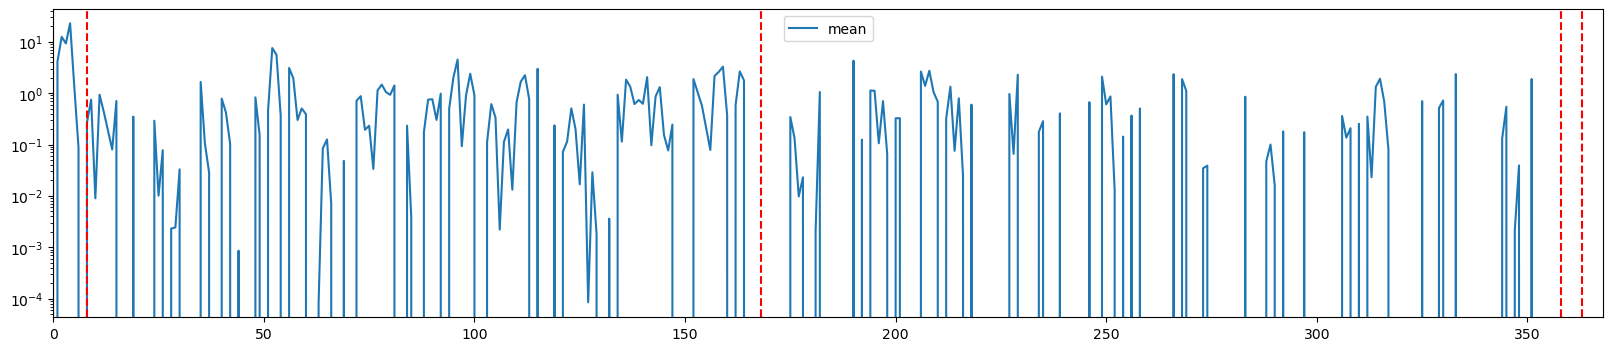

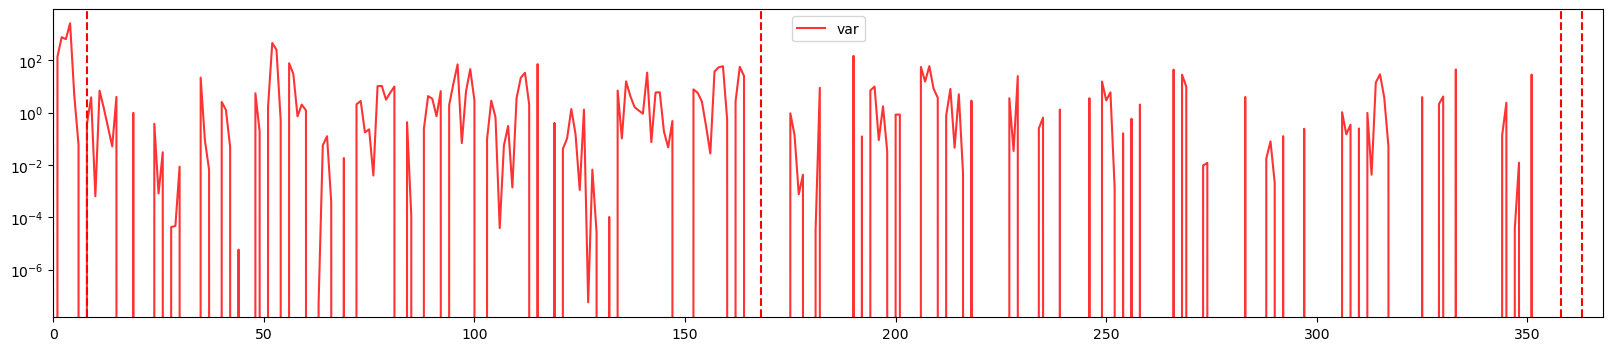

In [42]:
nrg_lvls = np.unique(incident_energies)

nrg_lvl = nrg_lvls[0]
i_idx = np.where(incident_energies == nrg_lvl)[0]

hlf.DrawAverageShower(showers[i_idx])

plt.figure(figsize=(20,4))
lr_bound = np.unique(hlf.bin_edges)
for lr_idx in range(0,num_layers):
    plt.subplot(1,num_layers, lr_idx+1)
    shower = np.mean(showers[i_idx, lr_bound[lr_idx]:lr_bound[lr_idx+1]],axis=0)
    plt.plot(shower)

# Plot mean
plt.figure(figsize=(20,4))
shower = showers[i_idx, :]
plt.semilogy(np.mean(shower,axis=0),label="mean")
for lr_idx in range(0,num_layers):
    plt.axvline(x=lr_bound[lr_idx], color='red', linestyle='--')
plt.xlim(0,368)
plt.legend()

# Plot variance
plt.figure(figsize=(20,4))
shower = showers[i_idx, :]
plt.semilogy(np.var(shower,axis=0),'r',alpha=0.8,label='var')
for lr_idx in range(0,num_layers):
    plt.axvline(x=lr_bound[lr_idx], color='red', linestyle='--')
plt.xlim(0,368)
plt.legend()

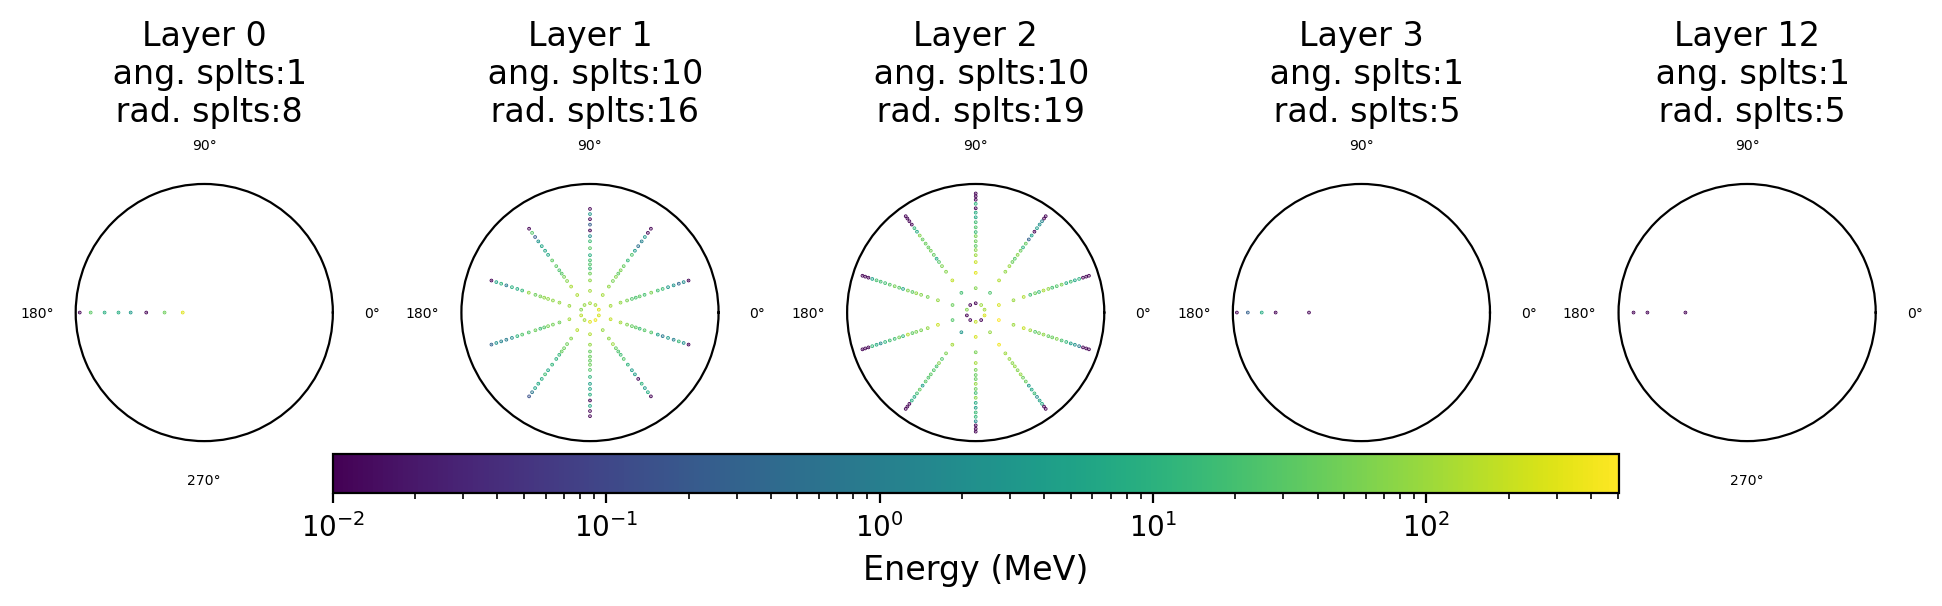

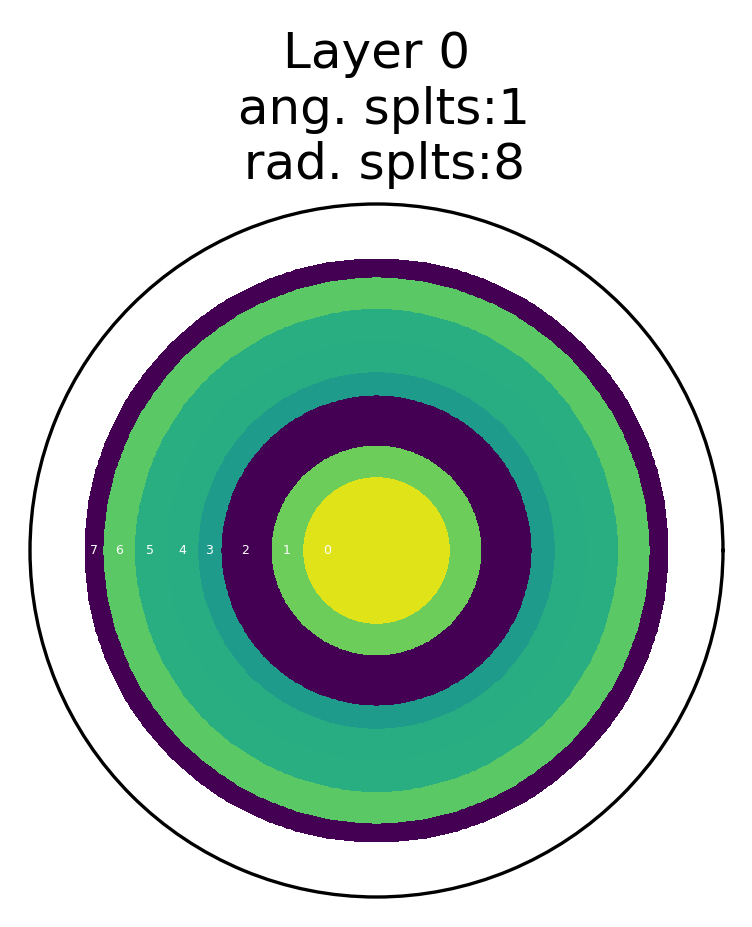

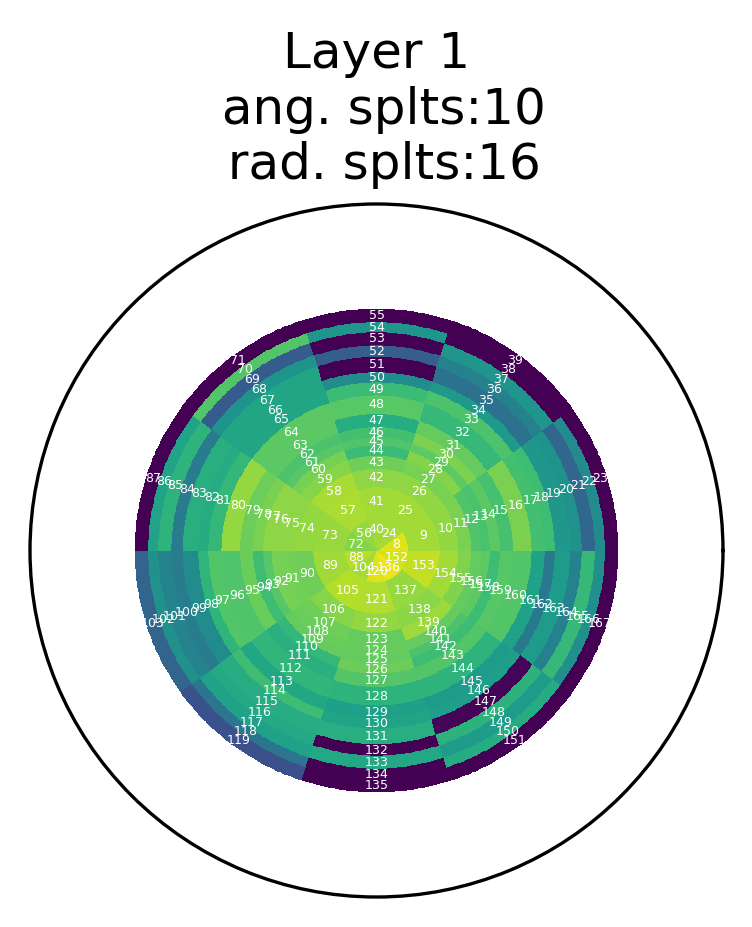

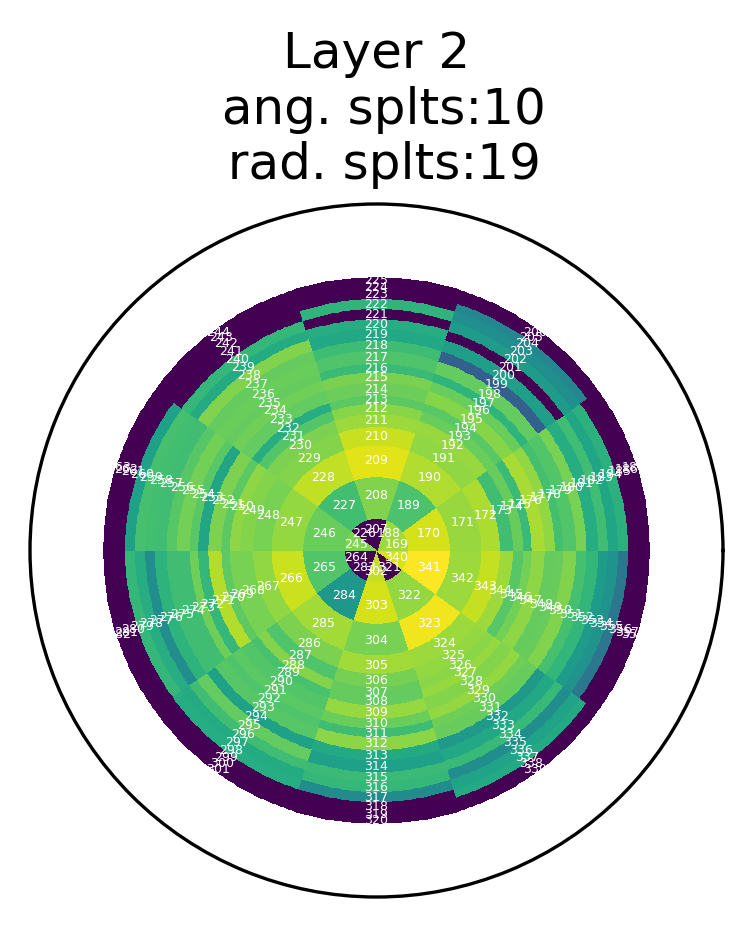

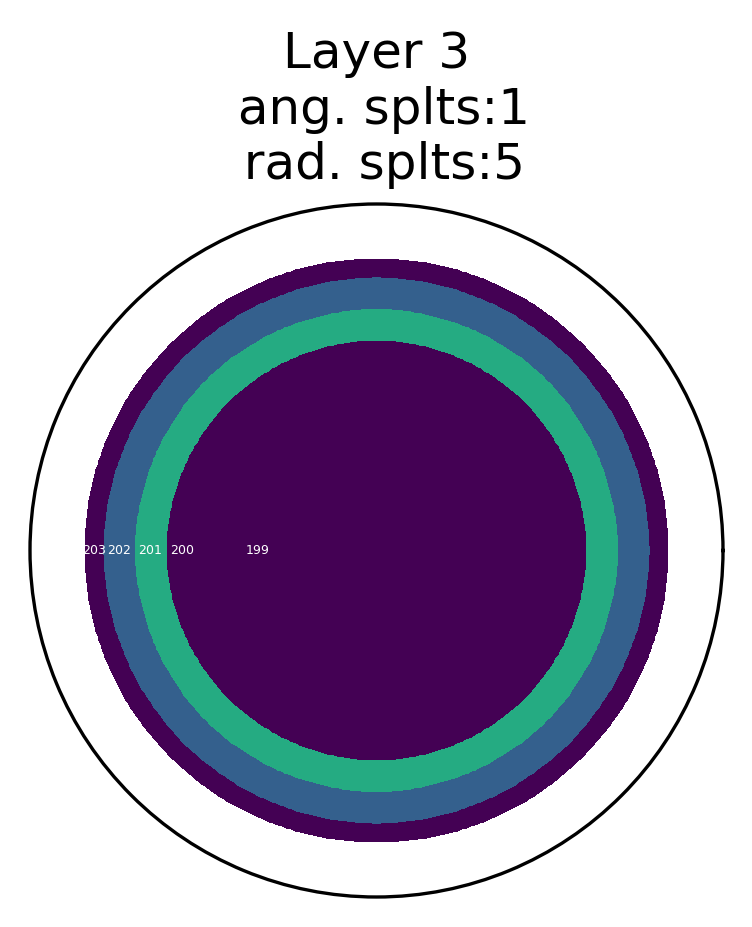

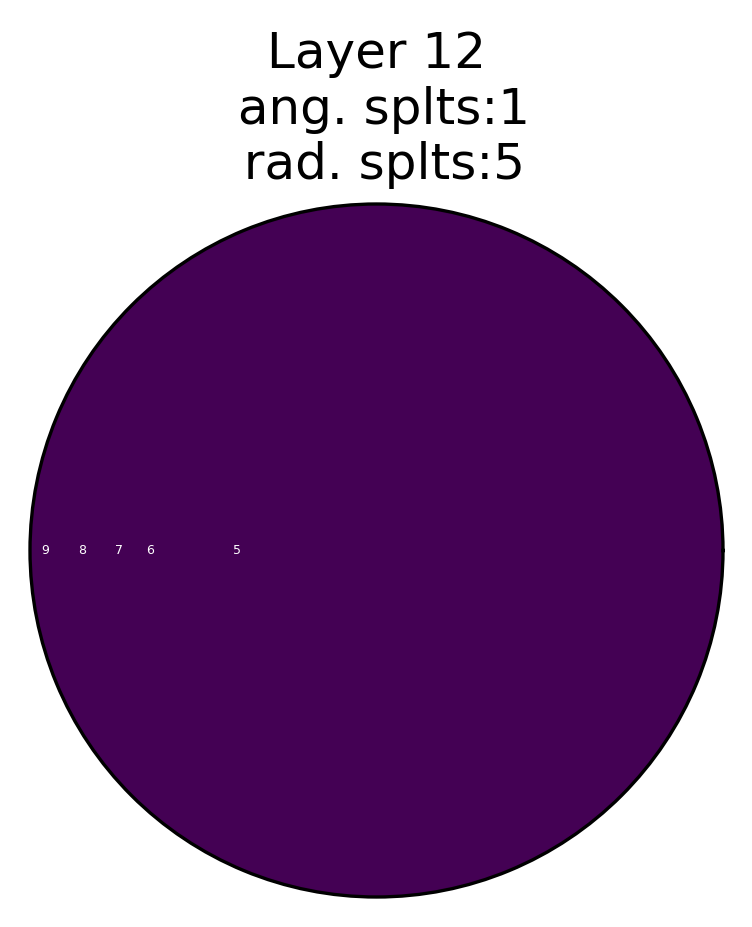

In [50]:
from HighLevelFeaturesExtended import HighLevelFeaturesExtended as HLFe

hlf_ext = HLFe('photon', binning_xml='../CaloChallenge/code/binning_dataset_1_photons.xml')
# hlf_ext = HLFe('electron', binning_xml='../CaloChallenge/code/binning_dataset_2.xml')

hlf_ext.DrawPC(data=showers[i_idx], filename=None, title=None)
hlf_ext.DrawSingleShowerNum(data=showers[i_idx], filename=None, title=None)